(1) 문제 정의
 - XOR 논리: 두 개가 다른 논리인 경우에만 True
 - 기계가 XOR논리를 학습해서 추론할 수 있는지 확인

(2) 데이터 수집(데이터 정의))

In [2]:
data = [
        [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
        ]

In [3]:
import pandas as pd
import numpy as np

(3) 전처리
(4) EDA

In [4]:
# data 리스트를 데이터프레임으로 변경 (컬럼명: A,B,,XOR)
col = ['A', 'B', 'XOR']
df = pd.DataFrame(data, columns = col)
df

,A,B,XOR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [5]:
#특성 데이터와 라벨 데이터로 분리
X = df.loc[:, 'A':'B']
y = df.loc[:,'XOR']

In [6]:
y

0    0
1    1
2    1
3    0
Name: XOR, dtype: int64

(5) 모델선택/ 파라미터 변경(최적화)

In [7]:
# knn 분류기
from sklearn.neighbors import KNeighborsClassifier

# 모델 정의(파라미터 정의)
knn_model = KNeighborsClassifier(n_neighbors=1)

(6) 학습

fit(특성데이터, 라벨데이터)

In [8]:
knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

(7) 평가
score(특성데이터, 라벨데이터) - 정확도 계산

In [9]:
sc = knn_model.score(X,y)
sc

1.0

(8) 추론

predict(새로운 특성데이터) -> 라벨을 예측

In [10]:
X_new = [[0,1],[1,0],[0,0],[1,0],[1,1]]
y_new = [1,1,0,1,0]

In [11]:
pred = knn_model.predict(X_new)

pred

array([1, 1, 0, 1, 0], dtype=int64)

새로운 데이터를 학습한 결과를 평가

- accuracy_score(예측한 값, 원래 값)

In [12]:
from sklearn.metrics import accuracy_score

sc1 = accuracy_score(pred, y_new)
sc1

1.0

### 실습

- AND 논리를 학습 시켜서 예측하는 모델을 작성(KNN)

In [13]:
data = [#AND
        [0,0,0],
        [0,1,0],
        [1,0,0],
        [1,1,1]
        ]

In [14]:
col_and = ['A', 'B', 'AND']
df_and = pd.DataFrame(data, columns = col_and)
df_and

,A,B,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [15]:
X = df_and.iloc[:,:2]
y = df_and.iloc[:,2]

In [16]:
# knn 분류기
from sklearn.neighbors import KNeighborsClassifier

# 모델 정의(파라미터 정의)
knn_model = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [18]:
sc = knn_model.score(X,y)
sc

1.0

In [19]:
X_new = [[0,1],[1,0],[0,0],[1,0],[1,1]]
y_new = [0,0,0,0,1]

In [20]:
pred = knn_model.predict(X_new)

pred

array([0, 0, 0, 0, 1], dtype=int64)

In [21]:
sc1 = accuracy_score(pred, y_new)

sc1

1.0

In [22]:
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

## BMI 데이터셋을 이용해서 머신러닝 학습

(1) 문제정의

- BMI 데이터셋을 이용해서 머신러닝 학습을 해보자
- 성별, 키, 몸무게 특성으로 체중에 대한 분류를 해보자.
- 과소적합 문제를 해결해 보자.

(2) 데이터 수집

In [59]:
bmi = pd.read_csv("bmi_500.csv")

bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


(3) 데이터 전처리

In [60]:
# 결측치 확인
# 삭제, 수정(채우기)
# 수정 : 통계적 방법에 의해서, 임의의 값으로 채우기
print(bmi.isnull().sum())
print('=====================')
print(bmi.info())

Gender    0
Height    0
Weight    0
Label     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB
None


In [61]:
# 이상치 (outlier) : 일반 값들에서 많이 벗어나 있는 값
# 삭제, 수정
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [62]:
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [63]:
bmi['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [64]:
#시각화 하는 함수
def myScatter(title, color):
    tmp = bmi[bmi['Label'] == title]
    
    plt.scatter(tmp['Weight'], tmp['Height'], c = color, label = title)

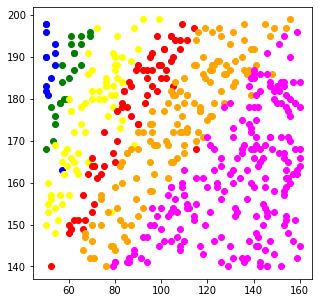

In [65]:
plt.figure(figsize=(5,5))

myScatter('Extremely Weak', 'blue')
myScatter('Weak', 'green')
myScatter('Normal', 'yellow')
myScatter('Overweight', 'red')
myScatter('Obesity', 'orange')
myScatter('Extreme Obesity', 'magenta')

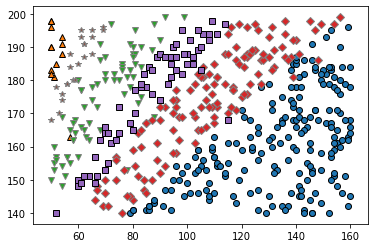

In [66]:
mglearn.discrete_scatter(bmi['Weight'], bmi['Height'], bmi['Label'], s= 6)

In [67]:
# X,y 분리

X = bmi.iloc[:,1:3]
y = bmi.iloc[:,3]

X.shape, y.shape

((500, 2), (500,))

In [68]:
X.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


훈련데이터와 테스트데이터로 분리

350개는 훈련데이터로 150개는 테스트데이터로 분리

In [69]:
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

(5) 모델선택/파라미터 튜닝/ 학습&평가

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [71]:
#knn_model2 = KNeighborsClassifier(n_neighbors=3)

#과소적합
knn_model2 = KNeighborsClassifier(n_neighbors=7)
knn_model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [72]:
train_sc = knn_model2.score(X_train, y_train)
test_sc = knn_model2.score(X_test,y_test)

train_sc,test_sc

(0.92, 0.9133333333333333)

In [73]:
predict = knn_model2.predict(X_test)

print(accuracy_score(predict, y_test))

0.9133333333333333


In [74]:
train_acc = []
test_acc = []

neighbor = range(1,20)

for n in neighbor:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train,y_train)
    
    train_acc.append(knn_model.score(X_train,y_train))
    test_acc.append(knn_model.score(X_test,y_test))
    

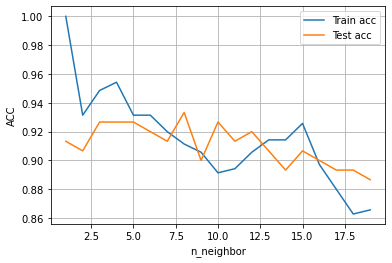

In [75]:
plt.plot(neighbor, train_acc, label = 'Train acc')
plt.plot(neighbor, test_acc, label = 'Test acc')
plt.legend(loc = 'best') #loc ->범례의 위치 지정 생략시 자동으로 최적의 자리
plt.ylabel('ACC')
plt.xlabel('n_neighbor')
plt.grid()
plt.show()

In [76]:
# 인코딩: 카테고리 데이터를 숫자로 변환하는 작업
# 라벨인코딩
bmi['Gender'] = bmi['Gender'].map({'Male':0, 'Female':1})
bmi

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight
...,...,...,...,...
495,1,150,153,Extreme Obesity
496,1,184,121,Obesity
497,1,141,136,Extreme Obesity
498,0,150,95,Extreme Obesity


In [78]:
# X,y 분리

X = bmi.iloc[:,:-1]
y = bmi.iloc[:,-1]

X.shape, y.shape

((500, 3), (500,))

In [81]:
display(X.head())
display(y.head())

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61


0       Obesity
1        Normal
2       Obesity
3    Overweight
4    Overweight
Name: Label, dtype: object

In [82]:
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [83]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [84]:
print(knn_model.score(X_train, y_train))
print(knn_model.score(X_test, y_test))

0.9085714285714286
0.92


In [85]:
train_acc2 = []
test_acc2 = []

neighbor = range(1,20)

for n in neighbor:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train,y_train)
    
    train_acc2.append(knn_model.score(X_train,y_train))
    test_acc2.append(knn_model.score(X_test,y_test))    

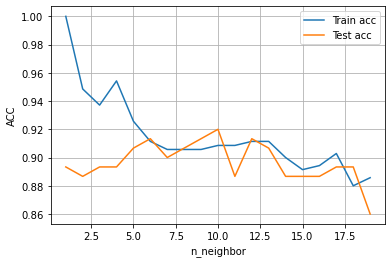

In [86]:
plt.plot(neighbor, train_acc2, label = 'Train acc')
plt.plot(neighbor, test_acc2, label = 'Test acc')
plt.legend(loc = 'best') #loc ->범례의 위치 지정 생략시 자동으로 최적의 자리
plt.ylabel('ACC')
plt.xlabel('n_neighbor')
plt.grid()
plt.show()